In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

sent = pd.read_csv('PNGS/allS.txt')
matplotlib.rcParams.update({'font.size': 12})

plot_scale = [0.0, 0.8, 0.0, 0.8]

In [2]:
all_data = pd.read_csv('PNGS/ALL.txt')

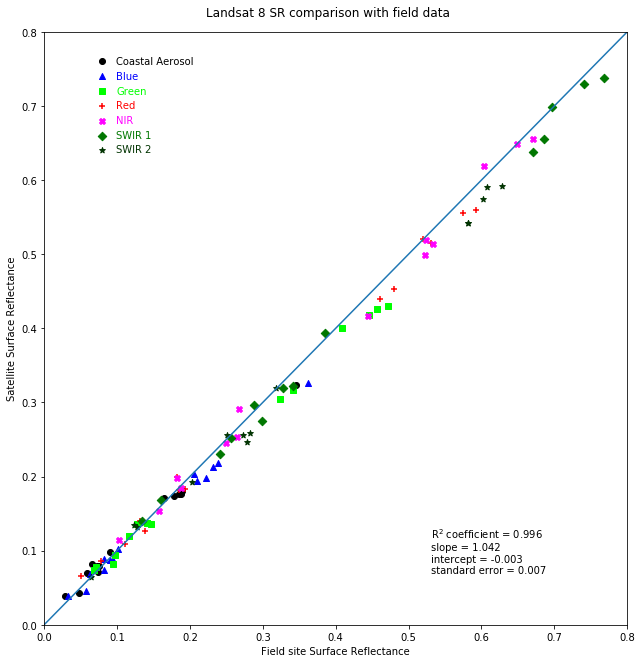

In [82]:
ls = all_data[all_data.Platform == 'LS8']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
fig.suptitle('Landsat 8 SR comparison with field data')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0)

plt.scatter(ls[ls.BAND == 'CA'].fieldmean,ls[ls.BAND == 'CA'].satmean, marker='o', color='black')
plt.scatter(ls[ls.BAND == 'blue'].fieldmean,ls[ls.BAND == 'blue'].satmean, marker='^', color='#0000FF')
plt.scatter(ls[ls.BAND == 'green'].fieldmean,ls[ls.BAND == 'green'].satmean, marker='s', color='#00FF00')
plt.scatter(ls[ls.BAND == 'red'].fieldmean,ls[ls.BAND == 'red'].satmean, marker='+', color='#FF0000')
plt.scatter(ls[ls.BAND == 'nir'].fieldmean,ls[ls.BAND == 'nir'].satmean, marker='X', color='#FF00FF')
plt.scatter(ls[ls.BAND == 'swir1'].fieldmean,ls[ls.BAND == 'swir1'].satmean, marker='D', color='#007700')
plt.scatter(ls[ls.BAND == 'swir2'].fieldmean,ls[ls.BAND == 'swir2'].satmean, marker='*', color='#003300')

plt.xlim(plot_scale[0], plot_scale[1])
plt.ylim(plot_scale[2], plot_scale[3])
x_stretch = (plot_scale[1]-plot_scale[0])
y_stretch = (plot_scale[3]-plot_scale[2])

plt.scatter((0.1*x_stretch)+plot_scale[0], (0.950*y_stretch)+plot_scale[2], marker='o', facecolors='black', edgecolors='black')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.925*y_stretch)+plot_scale[2], marker='^', facecolors='#0000FF', edgecolors='#0000FF')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.900*y_stretch)+plot_scale[2], marker='s', facecolors='#00FF00', edgecolors='#00FF00')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.875*y_stretch)+plot_scale[2], marker='+', facecolors='#FF0000', edgecolors='#FF0000')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.850*y_stretch)+plot_scale[2], marker='X', facecolors='#FF00FF', edgecolors='#FF00FF')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.825*y_stretch)+plot_scale[2], marker='D', facecolors='#007700', edgecolors='#007700')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.800*y_stretch)+plot_scale[2], marker='*', facecolors='#003300', edgecolors='#003300')

plt.figtext(0.190, 0.895, "Coastal Aerosol", color='black')
plt.figtext(0.190, 0.873, "Blue", color='#0000FF')
plt.figtext(0.190, 0.852, "Green", color='#00FF00')
plt.figtext(0.190, 0.831, "Red", color='#FF0000')
plt.figtext(0.190, 0.809, "NIR", color='#FF00FF')
plt.figtext(0.190, 0.788, "SWIR 1", color='#007700')
plt.figtext(0.190, 0.767, "SWIR 2", color='#003300')

slope, intercept, r_value, p_value, std_err = linregress(ls.satmean, ls.fieldmean)
plt.figtext(0.65, 0.15, "R$^2$ coefficient = "+str(round(r_value**2, 3))+"\nslope = "+str(round(slope, 3))+"\nintercept = "+str(round(intercept, 3))+"\nstandard error = "+str(round(std_err, 3)))

p1, p2 = [0, 1], [0, 1]
plt.plot(p1, p2)

plt.xlabel('Field site Surface Reflectance')
plt.ylabel('Satellite Surface Reflectance')
plt.savefig('PNGS/ls8.png')

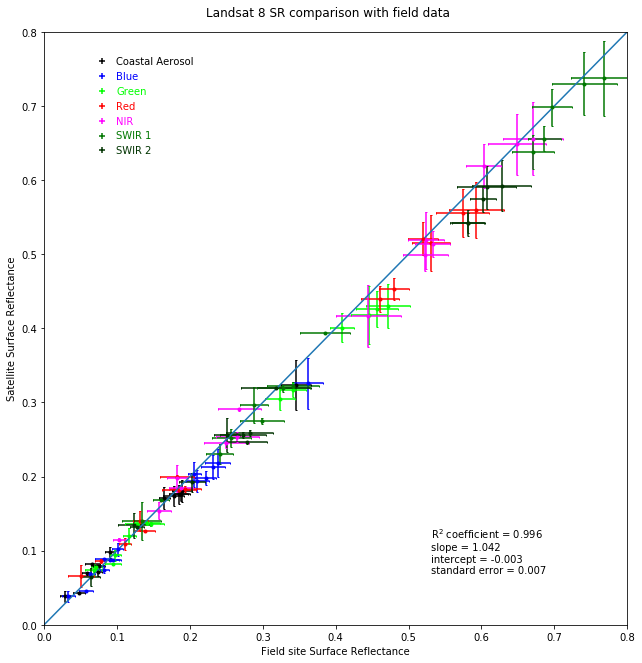

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
fig.suptitle('Landsat 8 SR comparison with field data')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0)

plt.errorbar(x=ls[ls.BAND == 'CA'].fieldmean,y=ls[ls.BAND == 'CA'].satmean, xerr=ls[ls.BAND == 'CA'].fieldstd,yerr=ls[ls.BAND == 'CA'].satstd,color='black',fmt='.', mec='#000000', capsize=1)
plt.errorbar(x=ls[ls.BAND == 'blue'].fieldmean,y=ls[ls.BAND == 'blue'].satmean, xerr=ls[ls.BAND == 'blue'].fieldstd,yerr=ls[ls.BAND == 'blue'].satstd, color='#0000FF',fmt='.', mec='#0000FF', capsize=1)
plt.errorbar(x=ls[ls.BAND == 'green'].fieldmean,y=ls[ls.BAND == 'green'].satmean, xerr=ls[ls.BAND == 'green'].fieldstd,yerr=ls[ls.BAND == 'green'].satstd, color='#00FF00',fmt='.', mec='#00FF00', capsize=1)
plt.errorbar(x=ls[ls.BAND == 'red'].fieldmean,y=ls[ls.BAND == 'red'].satmean, xerr=ls[ls.BAND == 'red'].fieldstd,yerr=ls[ls.BAND == 'red'].satstd, color='#FF0000',fmt='.', mec='#FF0000', capsize=1)
plt.errorbar(x=ls[ls.BAND == 'nir'].fieldmean,y=ls[ls.BAND == 'nir'].satmean, xerr=ls[ls.BAND == 'nir'].fieldstd,yerr=ls[ls.BAND == 'nir'].satstd, color='#FF00FF',fmt='.', mec='#FF00FF', capsize=1)
plt.errorbar(x=ls[ls.BAND == 'swir1'].fieldmean,y=ls[ls.BAND == 'swir1'].satmean, xerr=ls[ls.BAND == 'swir1'].fieldstd,yerr=ls[ls.BAND == 'swir1'].satstd, color='#007700',fmt='.', mec='#007700', capsize=1)
plt.errorbar(x=ls[ls.BAND == 'swir2'].fieldmean,y=ls[ls.BAND == 'swir2'].satmean, xerr=ls[ls.BAND == 'swir2'].fieldstd,yerr=ls[ls.BAND == 'swir2'].satstd, color='#003300',fmt='.', mec='#003300', capsize=1)

plt.xlim(plot_scale[0], plot_scale[1])
plt.ylim(plot_scale[2], plot_scale[3])
x_stretch = (plot_scale[1]-plot_scale[0])
y_stretch = (plot_scale[3]-plot_scale[2])

plt.scatter((0.1*x_stretch)+plot_scale[0], (0.950*y_stretch)+plot_scale[2], marker='+', facecolors='black', edgecolors='black')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.925*y_stretch)+plot_scale[2], marker='+', facecolors='#0000FF', edgecolors='#0000FF')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.900*y_stretch)+plot_scale[2], marker='+', facecolors='#00FF00', edgecolors='#00FF00')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.875*y_stretch)+plot_scale[2], marker='+', facecolors='#FF0000', edgecolors='#FF0000')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.850*y_stretch)+plot_scale[2], marker='+', facecolors='#FF00FF', edgecolors='#FF00FF')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.825*y_stretch)+plot_scale[2], marker='+', facecolors='#007700', edgecolors='#007700')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.800*y_stretch)+plot_scale[2], marker='+', facecolors='#003300', edgecolors='#003300')

plt.figtext(0.190, 0.895, "Coastal Aerosol", color='black')
plt.figtext(0.190, 0.873, "Blue", color='#0000FF')
plt.figtext(0.190, 0.852, "Green", color='#00FF00')
plt.figtext(0.190, 0.829, "Red", color='#FF0000')
plt.figtext(0.190, 0.808, "NIR", color='#FF00FF')
plt.figtext(0.190, 0.787, "SWIR 1", color='#007700')
plt.figtext(0.190, 0.765, "SWIR 2", color='#003300')

slope, intercept, r_value, p_value, std_err = linregress(ls.satmean, ls.fieldmean)
plt.figtext(0.65, 0.15, "R$^2$ coefficient = "+str(round(r_value**2, 3))+"\nslope = "+str(round(slope, 3))+"\nintercept = "+str(round(intercept, 3))+"\nstandard error = "+str(round(std_err, 3)))

p1, p2 = [0, 1.0], [0, 1.0]
plt.plot(p1, p2)

plt.xlabel('Field site Surface Reflectance')
plt.ylabel('Satellite Surface Reflectance')

plt.savefig('PNGS/ls8err.png')

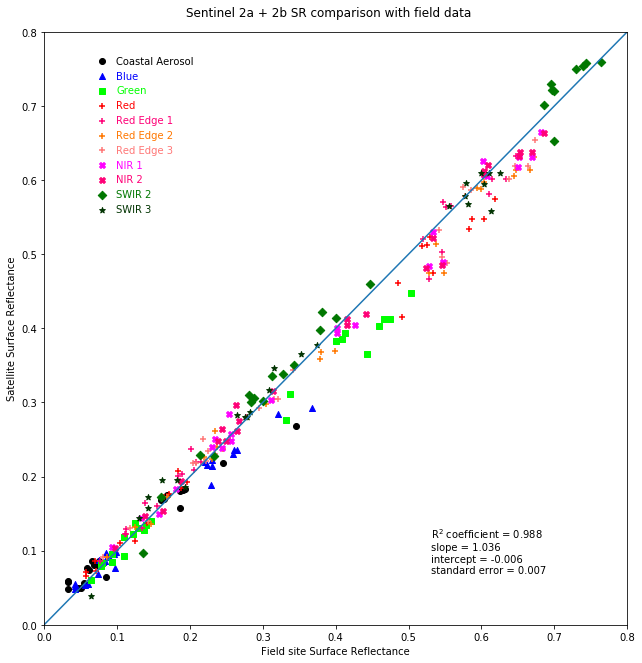

In [80]:
sent = all_data[np.logical_or(all_data.Platform == 'S2B', all_data.Platform == 'S2A')]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
fig.suptitle('Sentinel 2a + 2b SR comparison with field data')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0)

plt.scatter(x=sent[sent.BAND == 'CA'].fieldmean,y=sent[sent.BAND == 'CA'].satmean, marker='o', color='black')
plt.scatter(x=sent[sent.BAND == 'blue'].fieldmean,y=sent[sent.BAND == 'blue'].satmean, marker='^', color='#0000FF')
plt.scatter(x=sent[sent.BAND == 'green'].fieldmean,y=sent[sent.BAND == 'green'].satmean, marker='s', color='#00FF00')
plt.scatter(x=sent[sent.BAND == 'red'].fieldmean,y=sent[sent.BAND == 'red'].satmean, marker='+', color='#FF0000')
plt.scatter(x=sent[sent.BAND == 'RE1'].fieldmean,y=sent[sent.BAND == 'RE1'].satmean, marker='+', color='#FF0077')
plt.scatter(x=sent[sent.BAND == 'RE2'].fieldmean,y=sent[sent.BAND == 'RE2'].satmean, marker='+', color='#FF7777')
plt.scatter(x=sent[sent.BAND == 'RE3'].fieldmean,y=sent[sent.BAND == 'RE3'].satmean, marker='+', color='#FF7700')
plt.scatter(x=sent[sent.BAND == 'nir_1'].fieldmean,y=sent[sent.BAND == 'nir_1'].satmean, marker='X', color='#FF00FF')
plt.scatter(x=sent[sent.BAND == 'nir_2'].fieldmean,y=sent[sent.BAND == 'nir_2'].satmean, marker='X', color='#FF0077')
plt.scatter(x=sent[sent.BAND == 'swir_2'].fieldmean,y=sent[sent.BAND == 'swir_2'].satmean, marker='D', color='#007700')
plt.scatter(x=sent[sent.BAND == 'swir_3'].fieldmean,y=sent[sent.BAND == 'swir_3'].satmean, marker='*', color='#003300')

plt.xlim(plot_scale[0], plot_scale[1])
plt.ylim(plot_scale[2], plot_scale[3])
x_stretch = (plot_scale[1]-plot_scale[0])
y_stretch = (plot_scale[3]-plot_scale[2])

plt.scatter((0.1*x_stretch)+plot_scale[0], (0.950*y_stretch)+plot_scale[2], marker='o', facecolors='black', edgecolors='black')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.925*y_stretch)+plot_scale[2], marker='^', facecolors='#0000FF', edgecolors='#0000FF')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.900*y_stretch)+plot_scale[2], marker='s', facecolors='#00FF00', edgecolors='#00FF00')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.875*y_stretch)+plot_scale[2], marker='+', facecolors='#FF0000', edgecolors='#FF0000')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.850*y_stretch)+plot_scale[2], marker='+', facecolors='#FF0077', edgecolors='#FF0077')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.825*y_stretch)+plot_scale[2], marker='+', facecolors='#FF7700', edgecolors='#FF7700')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.800*y_stretch)+plot_scale[2], marker='+', facecolors='#FF7777', edgecolors='#FF7777')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.775*y_stretch)+plot_scale[2], marker='X', facecolors='#FF00FF', edgecolors='#FF00FF')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.750*y_stretch)+plot_scale[2], marker='X', facecolors='#FF0077', edgecolors='#FF0077')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.725*y_stretch)+plot_scale[2], marker='D', facecolors='#007700', edgecolors='#007700')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.700*y_stretch)+plot_scale[2], marker='*', facecolors='#003300', edgecolors='#003300')

plt.figtext(0.190, 0.895, "Coastal Aerosol", color='black')
plt.figtext(0.190, 0.874, "Blue", color='#0000FF')
plt.figtext(0.190, 0.853, "Green", color='#00FF00')
plt.figtext(0.190, 0.831, "Red", color='#FF0000')
plt.figtext(0.190, 0.809, "Red Edge 1", color='#FF0077')
plt.figtext(0.190, 0.787, "Red Edge 2", color='#FF7700')
plt.figtext(0.190, 0.766, "Red Edge 3", color='#FF7777')
plt.figtext(0.190, 0.744, "NIR 1", color='#FF00FF')
plt.figtext(0.190, 0.723, "NIR 2", color='#FF0077')
plt.figtext(0.190, 0.701, "SWIR 2", color='#007700')
plt.figtext(0.190, 0.679, "SWIR 3", color='#003300')

slope, intercept, r_value, p_value, std_err = linregress(sent.satmean, sent.fieldmean)
plt.figtext(0.65, 0.15, "R$^2$ coefficient = "+str(round(r_value**2, 3))+"\nslope = "+str(round(slope, 3))+"\nintercept = "+str(round(intercept, 3))+"\nstandard error = "+str(round(std_err, 3)))

p1, p2 = [0, 1.0], [0, 1.0]
plt.plot(p1, p2)

plt.xlabel('Field site Surface Reflectance')
plt.ylabel('Satellite Surface Reflectance')
plt.savefig('PNGS/sent.png')

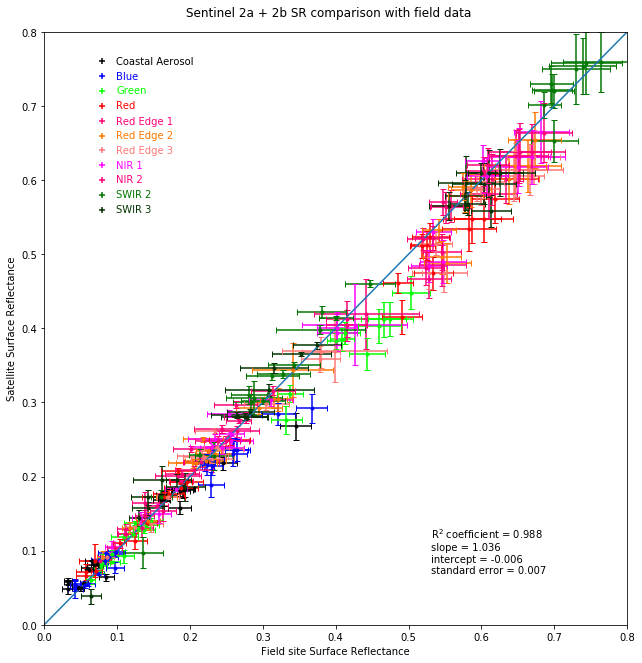

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
fig.suptitle('Sentinel 2a + 2b SR comparison with field data')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0)

plt.errorbar(x=sent[sent.BAND == 'CA'].fieldmean,y=sent[sent.BAND == 'CA'].satmean, xerr=sent[sent.BAND == 'CA'].fieldstd,yerr=sent[sent.BAND == 'CA'].satstd,fmt='.', mec='#000000', color='#000000', capsize=3)
plt.errorbar(x=sent[sent.BAND == 'blue'].fieldmean,y=sent[sent.BAND == 'blue'].satmean, xerr=sent[sent.BAND == 'blue'].fieldstd,yerr=sent[sent.BAND == 'blue'].satstd,color='#0000FF',fmt='.', mec='#0000FF', capsize=3)
plt.errorbar(x=sent[sent.BAND == 'green'].fieldmean,y=sent[sent.BAND == 'green'].satmean, xerr=sent[sent.BAND == 'green'].fieldstd,yerr=sent[sent.BAND == 'green'].satstd,color='#00FF00',fmt='.', mec='#00FF00', capsize=3)
plt.errorbar(x=sent[sent.BAND == 'red'].fieldmean,y=sent[sent.BAND == 'red'].satmean, xerr=sent[sent.BAND == 'red'].fieldstd,yerr=sent[sent.BAND == 'red'].satstd,color='#FF0000',fmt='.', mec='#FF0000', capsize=3)
plt.errorbar(x=sent[sent.BAND == 'RE1'].fieldmean,y=sent[sent.BAND == 'RE1'].satmean, xerr=sent[sent.BAND == 'RE1'].fieldstd,yerr=sent[sent.BAND == 'RE1'].satstd,color='#FF0077',fmt='.', mec='#FF0077', capsize=3)
plt.errorbar(x=sent[sent.BAND == 'RE2'].fieldmean,y=sent[sent.BAND == 'RE2'].satmean, xerr=sent[sent.BAND == 'RE2'].fieldstd,yerr=sent[sent.BAND == 'RE2'].satstd, color='#FF7700',fmt='.', mec='#FF7700', capsize=3)
plt.errorbar(x=sent[sent.BAND == 'RE3'].fieldmean,y=sent[sent.BAND == 'RE3'].satmean, xerr=sent[sent.BAND == 'RE3'].fieldstd,yerr=sent[sent.BAND == 'RE3'].satstd, color='#FF7777',fmt='.', mec='#FF7777', capsize=3)
plt.errorbar(x=sent[sent.BAND == 'nir_1'].fieldmean,y=sent[sent.BAND == 'nir_1'].satmean, xerr=sent[sent.BAND == 'nir_1'].fieldstd,yerr=sent[sent.BAND == 'nir_1'].satstd, color='#FF00FF',fmt='.', mec='#FF00FF', capsize=3)
plt.errorbar(x=sent[sent.BAND == 'nir_2'].fieldmean,y=sent[sent.BAND == 'nir_2'].satmean, xerr=sent[sent.BAND == 'nir_2'].fieldstd,yerr=sent[sent.BAND == 'nir_2'].satstd, color='#FF0077',fmt='.', mec='#FF0077', capsize=3)
plt.errorbar(x=sent[sent.BAND == 'swir_2'].fieldmean,y=sent[sent.BAND == 'swir_2'].satmean, xerr=sent[sent.BAND == 'swir_2'].fieldstd,yerr=sent[sent.BAND == 'swir_2'].satstd, color='#007700',fmt='.', mec='#007700', capsize=3)
plt.errorbar(x=sent[sent.BAND == 'swir_3'].fieldmean,y=sent[sent.BAND == 'swir_3'].satmean, xerr=sent[sent.BAND == 'swir_3'].fieldstd,yerr=sent[sent.BAND == 'swir_3'].satstd, color='#003300',fmt='.', mec='#003300', capsize=3)

plt.xlim(plot_scale[0], plot_scale[1])
plt.ylim(plot_scale[2], plot_scale[3])
x_stretch = (plot_scale[1]-plot_scale[0])
y_stretch = (plot_scale[3]-plot_scale[2])

plt.scatter((0.1*x_stretch)+plot_scale[0], (0.950*y_stretch)+plot_scale[2], marker='+', facecolors='black', edgecolors='black')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.925*y_stretch)+plot_scale[2], marker='+', facecolors='#0000FF', edgecolors='#0000FF')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.900*y_stretch)+plot_scale[2], marker='+', facecolors='#00FF00', edgecolors='#00FF00')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.875*y_stretch)+plot_scale[2], marker='+', facecolors='#FF0000', edgecolors='#FF0000')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.850*y_stretch)+plot_scale[2], marker='+', facecolors='#FF0077', edgecolors='#FF0077')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.825*y_stretch)+plot_scale[2], marker='+', facecolors='#FF7700', edgecolors='#FF7700')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.800*y_stretch)+plot_scale[2], marker='+', facecolors='#FF7777', edgecolors='#FF7777')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.775*y_stretch)+plot_scale[2], marker='+', facecolors='#FF00FF', edgecolors='#FF00FF')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.750*y_stretch)+plot_scale[2], marker='+', facecolors='#FF0077', edgecolors='#FF0077')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.725*y_stretch)+plot_scale[2], marker='+', facecolors='#007700', edgecolors='#007700')
plt.scatter((0.1*x_stretch)+plot_scale[0], (0.700*y_stretch)+plot_scale[2], marker='+', facecolors='#003300', edgecolors='#003300')

plt.figtext(0.190, 0.895, "Coastal Aerosol", color='black')
plt.figtext(0.190, 0.874, "Blue", color='#0000FF')
plt.figtext(0.190, 0.853, "Green", color='#00FF00')
plt.figtext(0.190, 0.831, "Red", color='#FF0000')
plt.figtext(0.190, 0.808, "Red Edge 1", color='#FF0077')
plt.figtext(0.190, 0.787, "Red Edge 2", color='#FF7700')
plt.figtext(0.190, 0.766, "Red Edge 3", color='#FF7777')
plt.figtext(0.190, 0.744, "NIR 1", color='#FF00FF')
plt.figtext(0.190, 0.723, "NIR 2", color='#FF0077')
plt.figtext(0.190, 0.701, "SWIR 2", color='#007700')
plt.figtext(0.190, 0.679, "SWIR 3", color='#003300')

slope, intercept, r_value, p_value, std_err = linregress(sent.satmean, sent.fieldmean)
plt.figtext(0.65, 0.15, "R$^2$ coefficient = "+str(round(r_value**2, 3))+"\nslope = "+str(round(slope, 3))+"\nintercept = "+str(round(intercept, 3))+"\nstandard error = "+str(round(std_err, 3)))

p1, p2 = [0, 1.0], [0, 1.0]
plt.plot(p1, p2)

plt.xlabel('Field site Surface Reflectance')
plt.ylabel('Satellite Surface Reflectance')

plt.savefig('PNGS/senterr.png')

In [41]:
from scipy.stats.stats import pearsonr

In [44]:
pearsonr(all_data.satmean, all_data.fieldmean)

(0.9951566758684771, 0.0)

In [45]:
from scipy.stats import linregress

In [49]:
slope, intercept, r_value, p_value, std_err = linregress(all_data.satmean, all_data.fieldmean)

In [50]:
r_value**2

0.9903368095255988

In [51]:
slope

1.0371109595094414

In [52]:
intercept

-0.004952142978360219

In [53]:
std_err

0.00539936618800442